In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\MAHI\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/dissertation data/data/plantvillage dataset/grayscale train/'
valid_path = 'D:/dissertation data/data/plantvillage dataset/grayscale test/'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('D:/dissertation data/data/plantvillage dataset/grayscale train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/dissertation data/data/plantvillage dataset/grayscale train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 54302 images belonging to 38 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:/dissertation data/data/plantvillage dataset/grayscale test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 13273 images belonging to 38 classes.


In [15]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\MAHI\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
849/849 [==============================] - 7870s 9s/step - loss: 5.4425 - accuracy: 0.6635 - auc: 0.8770 - precision: 0.6734 - recall: 0.6603 - val_loss: 3.3779 - val_accuracy: 0.7858 - val_auc: 0.9168 - val_precision: 0.7878 - val_recall: 0.7852
Epoch 2/25
849/849 [==============================] - 5418s 6s/step - loss: 2.5838 - accuracy: 0.8329 - auc: 0.9366 - precision: 0.8340 - recall: 0.8320 - val_loss: 2.1029 - val_accuracy: 0.8660 - val_auc: 0.9484 - val_precision: 0.8665 - val_recall: 0.8660
Epoch 3/25
849/849 [==============================] - 3539s 4s/step - loss: 2.2567 - accuracy: 0.8692 - auc: 0.9480 - precision: 0.8696 - recall: 0.8689 - val_loss: 1.7792 - val_accuracy: 0.8893 - val_auc: 0.9576 - val_precision: 0.8902 - val_recall: 0.8892
Epoch 4/25
849/849 [==============================] - 5043s 6s/step - loss: 2.3418 - accuracy: 0.8783 - auc: 0.9503 - precision: 0.8788 - recall: 0.8782 - val_loss: 1.6819 - val_accuracy: 0.9045 - val_auc: 0.9632 - val_precisi

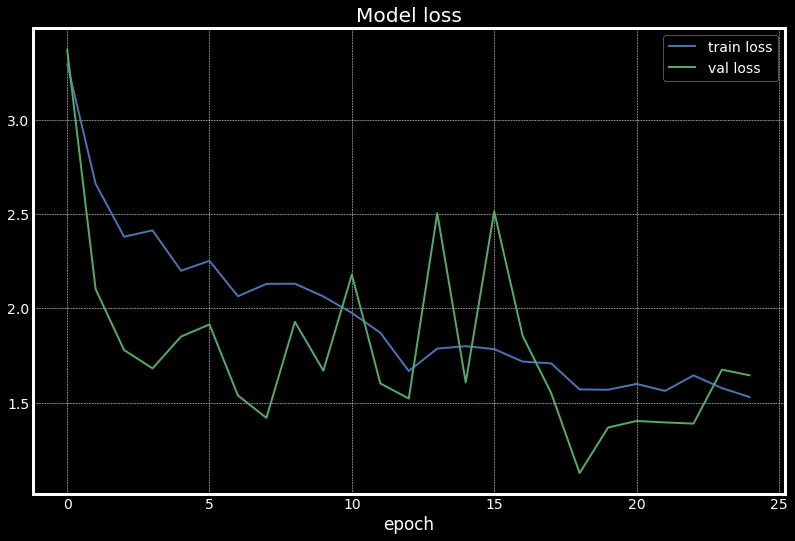

<Figure size 432x288 with 0 Axes>

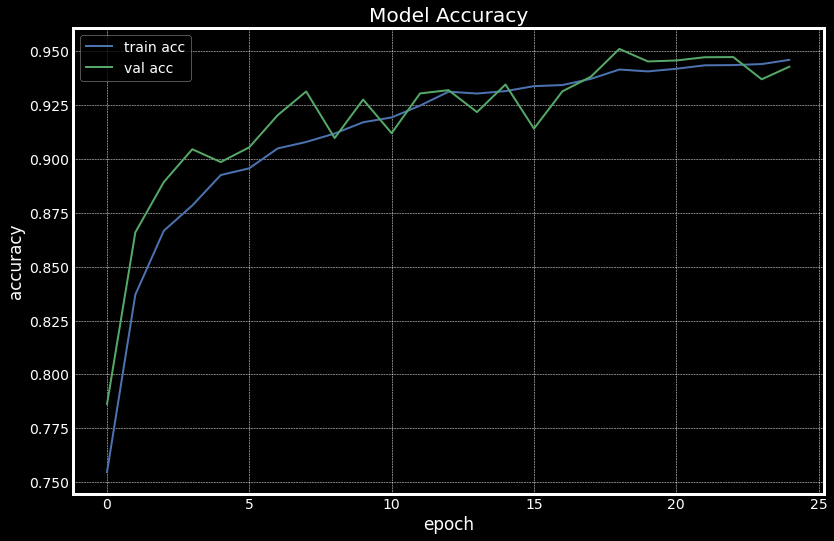

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')




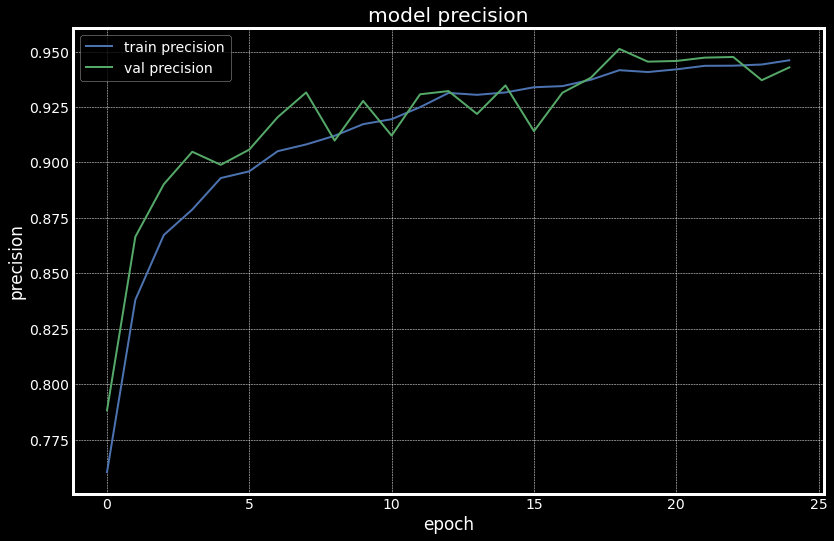

<Figure size 432x288 with 0 Axes>

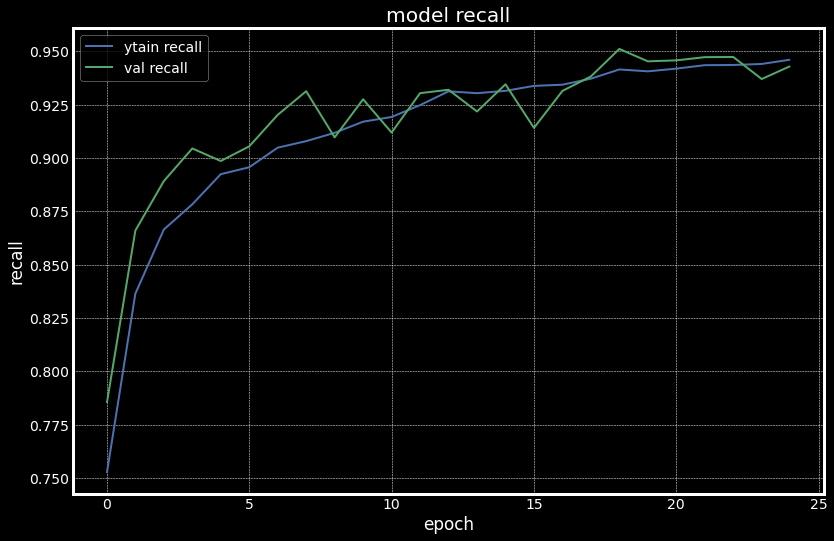

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the precision
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['precision'], label='train precision')
plt.plot(r.history['val_precision'], label='val precision')
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('precision_recall')


# plot the recall
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['recall'], label='ytain recall')
plt.plot(r.history['val_recall'], label='val recall')
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('recall')




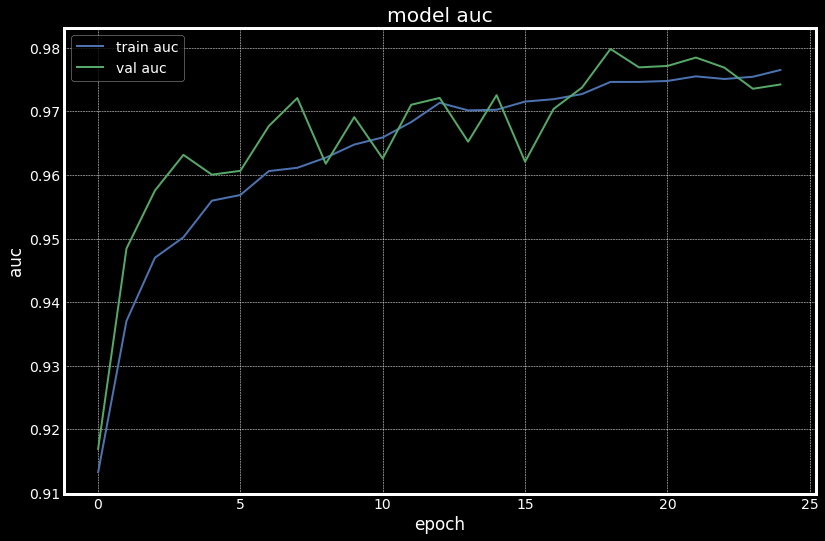

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the recall
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['auc'], label='train auc')
plt.plot(r.history['val_auc'], label='val auc')
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('auc')


In [39]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('third_model_inception.h5')

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [41]:
model=tf.keras.models.load_model('third_model_inception.h5')

In [42]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('D:potato early bright.jpg',target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result=model.predict_classes(test_image)

FileNotFoundError: [Errno 2] No such file or directory: 'D:potato early bright.jpg'

In [ ]:
result

In [ ]:
list(training_set.class_indices)[int(result)]

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__